## Load and explore the data

In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data set.
df3 = pd.read_csv('reviews1.csv')

# View the DataFrame.
df3.head()
df3.info()

df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Keep necessary columns. Drop unnecessary columns.
df3.drop(["gender", "age","remuneration","spending_score","loyalty_points","education","product"], axis = 1, inplace=True)



In [5]:
# view dataframe
df3.head()

,Unnamed: 0,review,summary
0,0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,As my review of GF9's previous screens these w...,Money trap


In [6]:
# Replace the missing values with 0.
df3.fillna(0, inplace=True)

# Determine the number of missing values.
df3.isna().sum()


Unnamed: 0    0
review        0
summary       0
dtype: int64

### Prepare the data for NLP

#### Change to lower case and join the elements in each of the columns respectively (review and summary)

In [9]:
# Transform data to lowercase.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [10]:
# Transform data to lowercase.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

#### Replace punctuation in each of the columns respectively (review and summary)

In [12]:
# Remove punctuation.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [13]:
# Remove punctuation.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### Dropping the duplicates in  columns

In [14]:
# Check the number of duplicate values in the COMMENTS column.
df3.review.duplicated().sum()

50

In [15]:
# Drop duplicates.
turtle = df3.drop_duplicates(subset=['review'])

# Preview data.
turtle.reset_index(inplace=True)
turtle.head()

,index,Unnamed: 0,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [16]:
# Check the number of duplicate values in the COMMENTS column.
df3.summary.duplicated().sum()

649

In [18]:
# Drop duplicates.
turtle = df3.drop_duplicates(subset=['summary'])

# Preview data.
turtle.reset_index(inplace=True)
turtle.head()

,index,Unnamed: 0,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [19]:
# View the shape of the data.
turtle.shape

(1351, 4)

In [24]:
# Drop multiple columns by Name
turtle.drop(["index", "Unnamed: 0"], axis = 1, inplace=True)

In [26]:
# View the shape of the data.
turtle.shape
turtle.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### Tokenising and creating wordclouds without stopwords

#### Visualising the most frequently used words in dataframe

In [28]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments = ''
for i in range(turtle.shape[0]):
    # Add each comment.
    all_comments = all_comments + turtle['review'][i]

In [30]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 

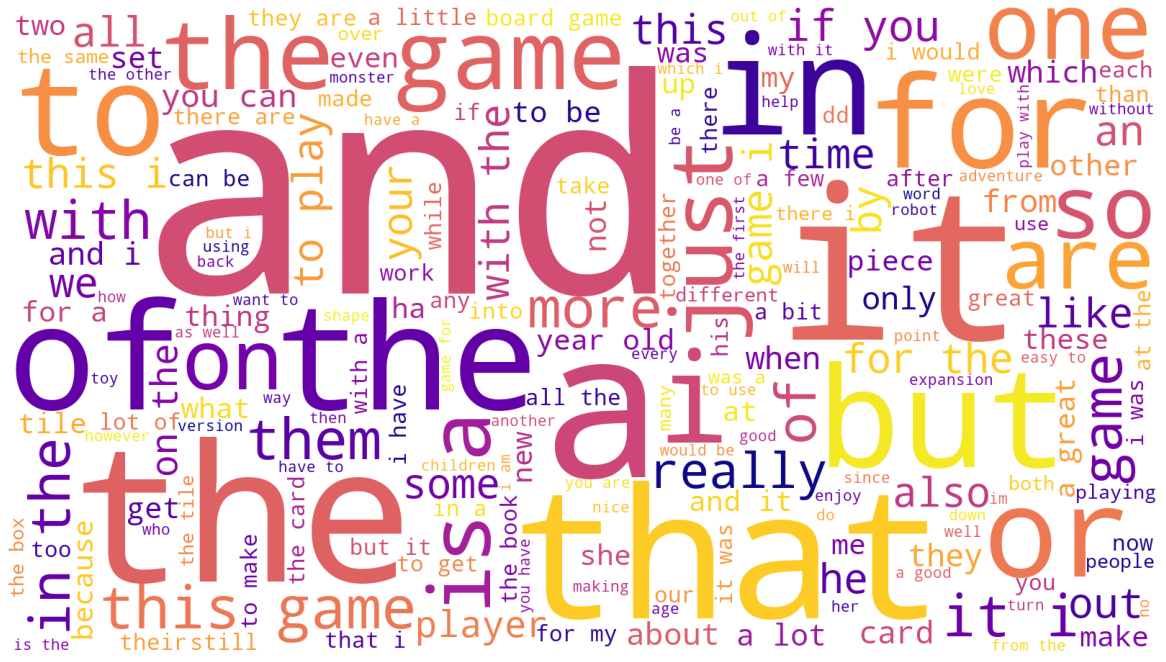

In [32]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## Applying tokenisation to  column review



In [34]:
# Tokenise the words.
turtle['tokens'] = turtle['review'].apply(word_tokenize)

# Preview data.
turtle['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [37]:
# Define an empty list of tokens.
all_tokens = []

for i in range(turtle.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + turtle['tokens'][i]

In [38]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5021, 'and': 2934, 'to': 2843, 'a': 2830, 'of': 2262, 'i': 1888, 'it': 1830, 'is': 1594, 'this': 1551, 'for': 1361, ...})

In [40]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

#### Eliminating stopwords

In [48]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yashveersuryavanshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Review: Create a word cloud

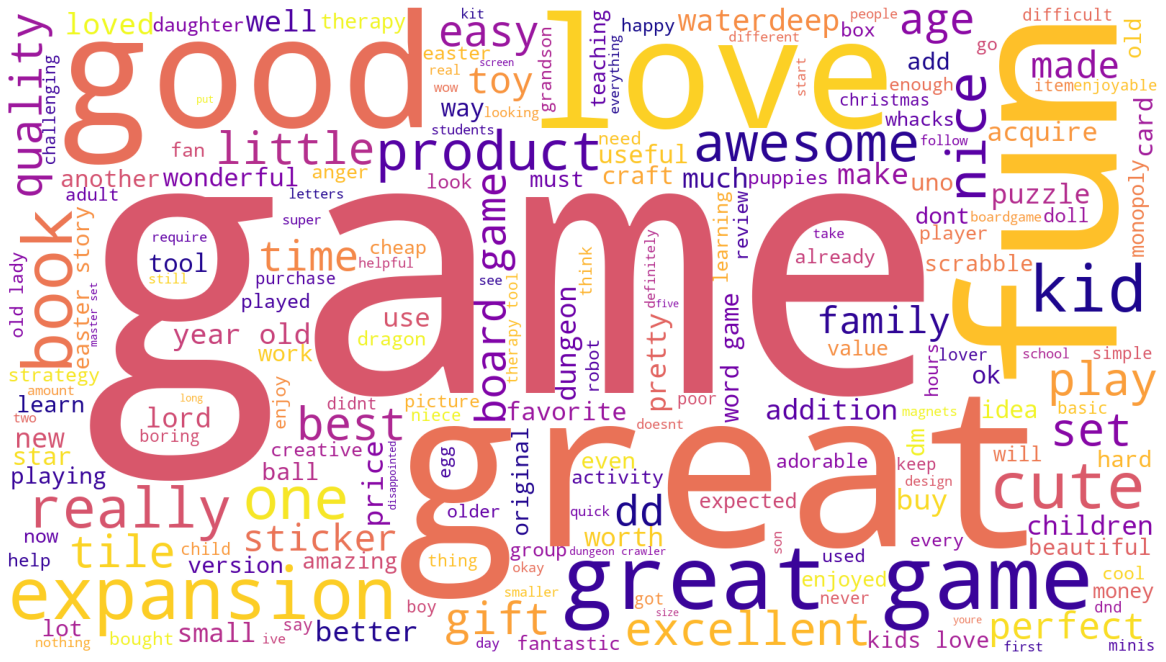

In [49]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



In [57]:
# Install TextBlob.
!pip install textblob

# Import the necessary package.
from textblob import TextBlob

#### polarity and subjectivity from the review column

In [58]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
turtle['polarity'] = turtle['review'].apply(generate_polarity)

# Preview the result.
turtle['polarity'].head()



0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

#### Visualising sentiment polarity scores on a histogram

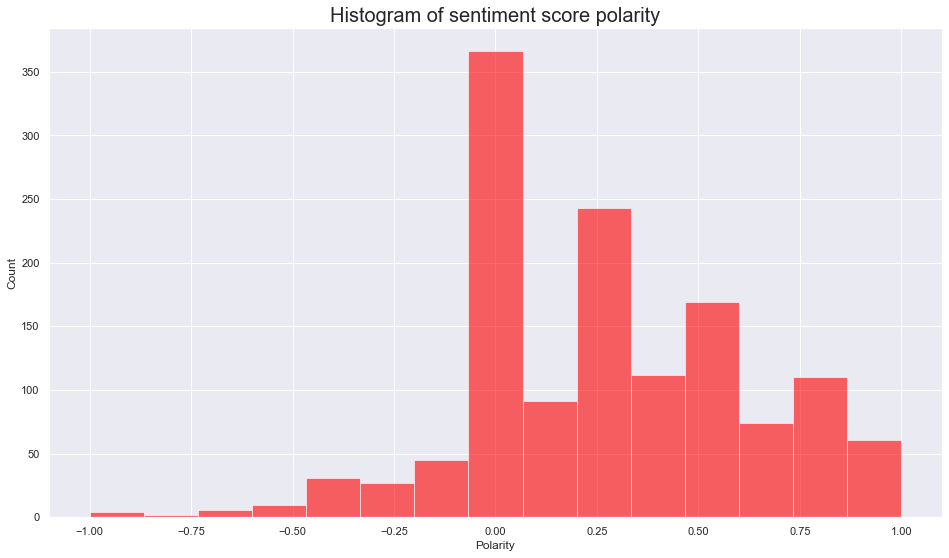

In [61]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(turtle['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

#### Extracting 20 positive comments from review column

In [83]:
# Create a DataFrame.
positive_sentiment = turtle.nlargest(10, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review','polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})



,review,polarity
5,i have bought many gm screens over the years but this one is the best i have ever seen it has all the relevant information i need and no crap filler on it very happy with this screen,1.000000
23,these are intricate designs for older children and adults this book is full of beautiful designs just waiting to be awakened by your choice of colors great for creativity,1.000000
27,awesome my 8 year olds favorite xmas gift its 915 am xmas morning and hes already colored three of these,1.000000
61,my daughter loves these little books theyre the perfect size to keep in the car or a diaper bag or purse i keep them on hand for times when were stuck waiting in a doctors office or anywhere else,1.000000
107,this occupied my almost3 year old for nearly an hour stickers were durable and easy to peel afterwards he kept going back to the box to see if there were more robot stickers to assemble in there ill probably drop another dollar and buy it again for his christmas stocking three cheers for the short memory of a preschooler,1.000000
112,i bought 8 of these for my 3 year old daughters robot themed birthday party as favors for the little ones and it was a great hit i didnt realize that the stickers were robot parts that the kids assemble themselves to create their own robots that was a lot of fun and for the price it was well worth it,1.000000
132,my 8 year old son loves this drawing book loves it,1.000000
133,this was a christmas present for a nephew who loves to draw and he loves superheroes he was very happy with his gift,1.000000
150,great product took a little practice and time but after you get the hang of it it turns into a cute cuddly little friend mine didnt turn out exactly like the picture but it adds a taste of your own sense of style they are super cute and comes with everything it says it will,1.000000
166,i was skeptical but my 9 year old has had so much fun with this kit and it was her favorite christmas present she pretty much made the puppies herself with minimal help from me though i did hot glue some ears rather than use the included glue only downside is the cuttings can be messy but really wonderful instructions wellmade supplies and can be used for many yearsand maybe even making different animals if you are creative highly recommend for artsy determined 9 year olds i actually want to try to make one myself they are so darn cute,1.000000


#### Extracting 20 negative comments from review column

In [78]:
# Create a DataFrame.
negative_sentiment = turtle.nsmallest(10, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review','polarity',]]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})



,review,polarity
17,these are cute tatoos for those who love pirates however the retail price is 150 and amazons price is more than double i have never paid over the retail price for an item at amazon i was shocked there are only a handful of tatoos and for 150 i wouldnt mind but to charge 350 for an item that sells anywhere else for 150 is criminal find it at a local drugstore and save your,-1.000000
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
588,ive discovered that im really new school when it comes to my board games except for boggle and a couple chess boards and a novelty version of yahtzee this is the oldest game i own by more than 30 years its very watered down for my usual tastes gameplay consists of playing tiles on a board to start expand or merge hotel chains then you buy stocks trying to predict which ones will grow so you can buy as low as possible and sell them for huge profits by the end of the game the player with the most money at the end wins i think this game is certainly better with more people it can accommodate up to 6 and that may be too many ive never played with that number but with 3 or fewer it is too easy to run away with the game more players offers more competition and gaps between your turns and dilutes the available stock with three you can see what tiles you have available and buy up huge amounts of stock early before other players have time to react and attempt to thwart your plan or prevent you from a big payout ive enjoyed power grid and have intended on playing a deeper economic game for some time but this certainly isnt it this is much more shallow an experience although it does play reasonably quickly and may fill a shorter time slot if players are looking for a quick buy and sell stock game,-1.000000
838,before this i hated running any rpg campaign dealing with towns because it kills the momentum and just becomes 2 hours of haggling for magic items this helps open up story ideas and plot hooks,-0.900000
1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,-0.800000
116,my kids grew up with a peg bench and hammer and loved it but i bought this brand for my grandson and was disappointed the pegs fit too loosely into the bench and he does not even use his hammer to pound them in as he can just push them in with his hand or sometimes they fall through automatically my suggestion is to make the pegs fit a little tighter so the kids can learn skills of coordination etc when pounding them in the pegs are nice and thick for little hands but just not snug enough fitting to really use the toy as it is intended,-0.750000
266,i found that this card game does the opposite of what it was intended for it actually has the kids focusing on ways to get angry etc instead of teaching how to be calm and act better it really should have been tested before sale a better game would have been calm dragon i tried this game on kids that had absolutely no behavior or anger problems and they began behaving badly and getting angry after the second round i dont recommend this i am a therapist and i work with kids with anger issues all day long i thought this might be a good tool i was wrong,-0.700000
635,i guess i did not look c

## Applying tokenisation to column summary

In [41]:
# Tokenise the words.
turtle['tokens'] = turtle['summary'].apply(word_tokenize)

# Preview data.
turtle['tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

In [42]:
# Define an empty list of tokens.
all_tokens = []

for i in range(turtle.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + turtle['tokens'][i]

In [43]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [44]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

#### Eliminating stopwords

In [46]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yashveersuryavanshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### summary: Create a word cloud

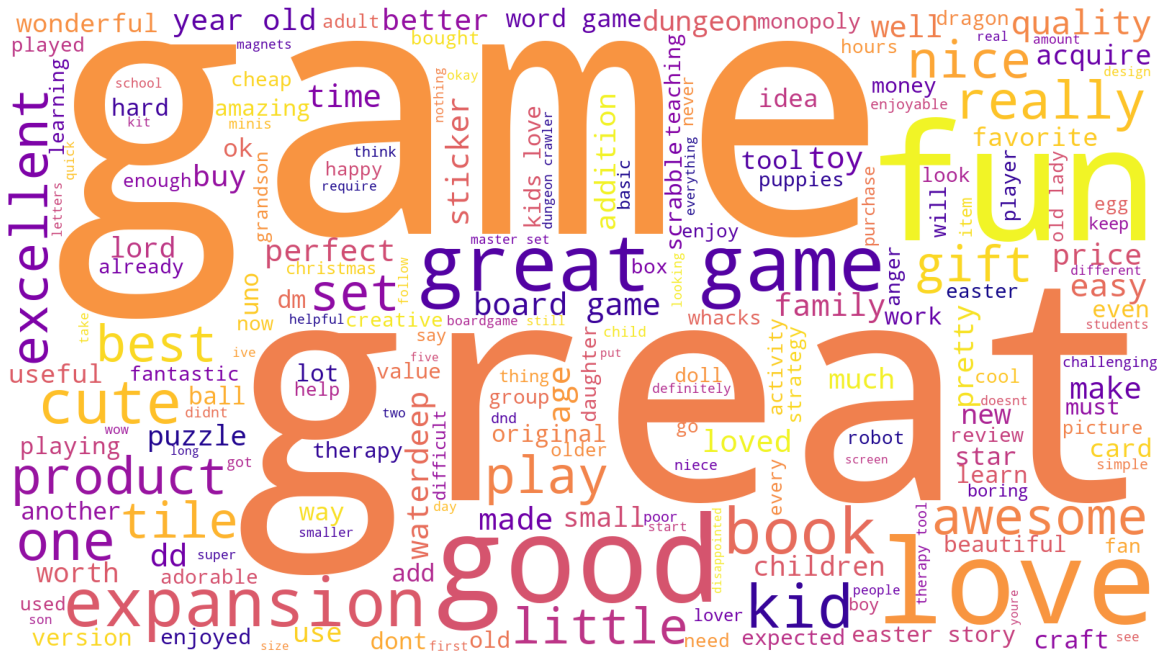

In [47]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


####  polarity and subjectivity from the summary column

In [68]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
turtle1['polarity'] = turtle['summary'].apply(generate_polarity)

# Preview the result.
turtle1['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

### Visualise sentiment polarity scores on a histogram

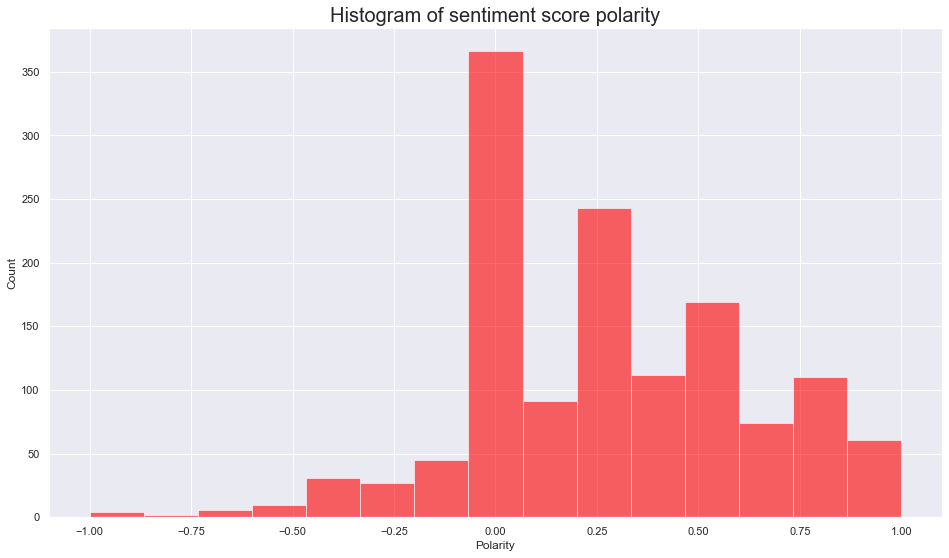

In [69]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(turtle1['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

#### Extracting 20 positive comments from summary column

In [82]:
# Create a DataFrame.
positive_sentiment = turtle.nlargest(10, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary','polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})



,summary,polarity
5,best gm screen ever,1.000000
23,wonderful designs,1.000000
27,perfect,1.000000
61,theyre the perfect size to keep in the car or a diaper,1.000000
107,perfect for preschooler,1.000000
112,awesome sticker activity for the price,1.000000
132,awesome book,1.000000
133,he was very happy with his gift,1.000000
150,awesome,1.000000
166,awesome and welldesigned for 9 year olds,1.000000


#### Extracting 20 negative comments from summary column

In [81]:
# Create a DataFrame.
negative_sentiment = turtle.nsmallest(10, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary','polarity',]]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})


,summary,polarity
17,the worst value ive ever seen,-1.000000
165,boring unless you are a craft person which i am,-1.000000
588,boring,-1.000000
838,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
116,disappointed,-0.750000
266,promotes anger instead of teaching calming methods,-0.700000
635,too bad this is not what i was expecting,-0.700000
638,bad qualityall made of paper,-0.700000
144,at age 31 i found these very difficult to make,-0.650000


### the top 15 words that appear most often

In [52]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [54]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,268
the,258
a,238
great,237
for,229
to,192
fun,175
and,168
it,139


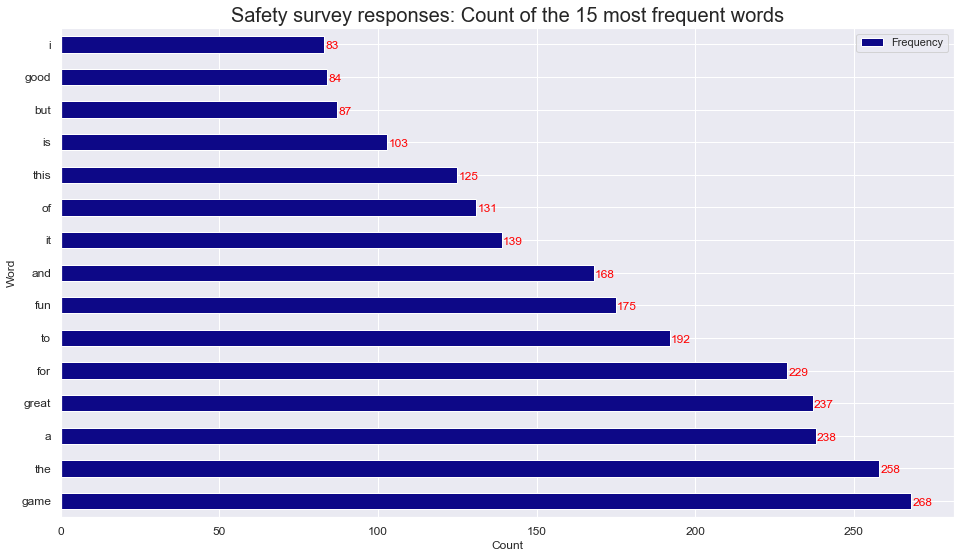

In [55]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### Insights and observations

#### NLP and tokenisation helped in breaking down the texts and understand them on such a scale.
#### in whole data set we could deduce words such as game ,great,fun,good used in the reviews and summary columns.
#### with finding out the sentiment polarity scores we were able to narrow down negative and positive comments easliy in the review and summary sections
#### with the histogram of sentiment score polarity we were also able to conclude that a majority neutral feedback was among the people which is also called as promoters 
#### there were good passive audience present as can be seen in the histogram and a small portion of detractors there.